# 로지스틱 회귀
- 몇 가지의 이산적인 값 중 하나를 선택하는 모델
- 이진 분류 문제를 확률로 표현한는 방법


---
#### 오즈비 : P(X)/(1-P(X))
* 로짓함수 : 오즈비에 상용로그를 붙인 함수
* 시그모이드 함수 : 로짓함수의 역함수, 1 / (1+e^-z)

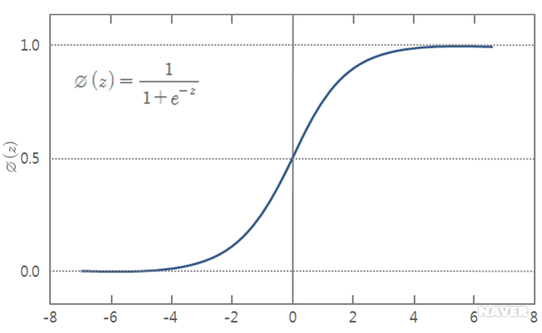


#### z 값은 선형회귀와 같이 가중치와 피쳐의 선형 결합으로 표현 가능,
가중치 값을 찾아야 하고 이를 위해 경사하강법 알고리즘 사용

### 즉, 어떤 데이터를 z 값들로 표현한다면 이에 대한 확률 p를 구할 수 있다.

- 회귀의 성능지표 : MAE, MSE, RMSE, SSE
- 분류의 성능지표 : 정확도, 정밀도, 민감도, F1 스코어, ROC 커브, 리프트 차트
- 클러스터링 : DBI, 엘보우 메서드, 실루엣계수

### 혼동행렬 

- true positive : 1(positive)로 예측했는데 맞음(true)
- false negative : 0(negative)로 예측했는데 틀림(false)
- false positive : 1(positive)로 예측했는데 틀림(false)
- true negative : 0(negative)로 예측했는데 맞음(true)

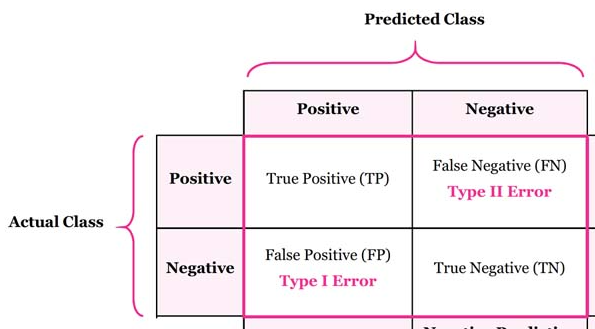


In [1]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred) # [[tn, fp], [fn, tp]]

array([[2, 0],
       [1, 3]])

In [2]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp) # 개수

(2, 0, 1, 3)

### 정확도 accuracy : 전체 데이터 개수 대비 맞춘 데이터의 개수

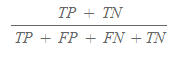

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = np.array([0,1,1,0])
y_true = np.array([0,1,0,0])
sum(y_true == y_pred) / len(y_true)

0.75

In [4]:
accuracy_score(y_true, y_pred)

0.75

### 정밀도와 민감도는 불균일한 데이터셋에 유용(데이터의 1과 0 비율이 7:3, 3:7 이상일 때)

- 정밀도 precision : 모델이 1이라고 예측했을 때, 얼마나 잘 맞을지에 대한 비율

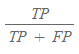

- 민감도(=반환율, 재현율) recall : 실제 1인 값을 가진 데이터를 모델이 얼마나 1이라고 잘 예측했는지에 대한 비율

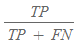

- precision과 recall은 trade-off 관계

- F1 스코어 : 정밀도와 민감도를 통합한 지표, 정밀도와 민감도의 조화평균

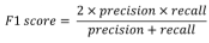

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = np.array([0,1,1,0,1,1,1,0])
y_true = np.array([0,1,0,0,0,0,1,1])
precision_score(y_true, y_pred)

0.4

In [6]:
recall_score(y_true, y_pred)

0.6666666666666666

In [7]:
f1_score(y_true, y_pred)

0.5

In [10]:
# 시그모이드 함수
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [9]:
# 가설 함수
def hypothesis_function(x, theta):
  z = (np.dot(-x, theta))  # 가중치와 피쳐의 선형결합
  return sigmoid(z)

In [11]:
# 비용함수
def compute_cost(x, y, theta):
  m = y.shape[0]
  J = (-1.0/m)*(
      y.T.dot(np.log(hypothesis_function(x,theta))) + \
      (1-y).T.dot(np.log(1-hypothesis_function(x, theta))))
  
  return J

In [12]:
def minimize_gradient(x,y,theta, iterations=100000, alpha=0.01):
  m = y.size
  cost_history = []
  theta_history = []

  for _ in range(iterations):
    original_theta = theta
    for i in range(theta.size): # theta 만큼 돈다
      partial_marginal = x[:,i].reshape(x.shape[0], 1) # x의 i번째 데이터
      delta = hypothesis_function(x, original_theta) - y
      grad_i = delta.T.dot(partial_marginal)

      theta[i] = theta[i] - (alpha * grad_i) # theta 값 업데이트

    if (_%100) == 0:
      theta_history.append(theta)
      cost_history.append(compute_cost(x,y,theta))

  return theta, np.array(cost_history), np.array(theta_history)

In [13]:
# 사이킷런 사용해보기

import pandas as pd

data_url = 'http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt'
df = pd.read_table(data_url)
df[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [14]:
# 필요없는 열 드롭
df.pop('who')
df.pop('Country')
df.pop('Years on Internet')

df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [15]:
# 데이터 타입 변환하고 결측값 확인&채우기

category_cols = ['Gender','Household Income','Sexual Preference','Education Attainment','Major Occupation','Marital Status']
for col in category_cols:
  df[col] = df[col].astype('category')
df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [16]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

(19583, 38)

In [17]:
df_onehot.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

In [18]:
df_onehot.loc[pd.isnull(df_onehot['Age']), 'Age'] = df_onehot['Age'].mean()

In [19]:
x_data = df_onehot.iloc[:,1:].values
y_data = df_onehot.iloc[:,0].values.reshape(-1, 1) # 0번째 열인 Newbile이 y_data로, 벡터 -> 행렬
y_data.shape, x_data.shape

((19583, 1), (19583, 37))

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() # 모든 값이 0과 1사이에 있도록 전처리
x_data = min_max_scaler.fit_transform(x_data) 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((13120, 37), (6463, 37))

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True) # 상수항 포함
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

In [25]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn',
                   n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [26]:
logreg.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [27]:
logreg.predict_proba(X_test[:5])

array([[0.56843257, 0.43156743],
       [0.91112573, 0.08887427],
       [0.79481084, 0.20518916],
       [0.85841562, 0.14158438],
       [0.62764602, 0.37235398]])

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[4487,  275],
       [1350,  351]])

In [29]:
accuracy_score(y_true, y_pred)

0.7485687761101656